# Background

This project is trying to determine if a loan will be defaulted. This means that the issuer of the loan loses money when the borrower fails to pay. This is a problem because lenders risk losing money by giving money to borrowers without knowing if they will be paid back. This project will be used to determine if it could be determined before hand if a borrower will pay back a loan in full.  

In [3]:
# Imports.
import numpy as np
import sklearn as sk
import pandas as pd
import os
import matplotlib.pyplot as plt
import copy
from sklearn.preprocessing import LabelEncoder
import time

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Set working directory.
os.chdir('/Users/mattmartin/Desktop/DS 4400/Project')

# Dataset

The dataset comes from LendingClub. LendingClub brings investors and borrowers together to facilitate loans. Data was collected from loans given out from 2007 to 2018.  

In [117]:
# Read in the csv data file and convert it to a pandas dataframe for use. 
data = pd.read_csv('loan.csv')

In [118]:
len(data)

2260668

In [8]:
# Get rid of loan_status other than fully paid or charged off.
array = ['Fully Paid', 'Charged Off']
data = data.loc[data['loan_status'].isin(array)]

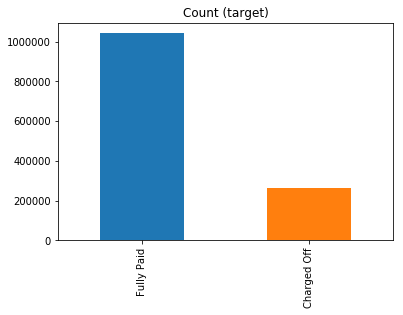

In [9]:
data['loan_status'].value_counts().plot(kind='bar', title='Count (target)');

In [10]:
# See distribution of labels.
data['loan_status'].value_counts()

Fully Paid     1041952
Charged Off     261655
Name: loan_status, dtype: int64

In [11]:
# Number of features in dataset.
len(data.columns)

145

In [12]:
# Number of points in dataset.
len(data)

1303607

# Data Preprocessing and Exploration

Before working with the data, categorical variables need to converted to numerical representations in order to be processed in the models. In order to do this certain numerical features, such as int_rate and term, needed to be formatted and converted to int type. Dummy encoding was used to convert categorical features such as purpose and grade. Missing values for each feature were then replaced with the mode of each respective feature. 

In [13]:
# See what features have high amounts of missing data.
data.isna().mean(axis = 0)

id                                            1.000000e+00
member_id                                     1.000000e+00
loan_amnt                                     0.000000e+00
funded_amnt                                   0.000000e+00
funded_amnt_inv                               0.000000e+00
term                                          0.000000e+00
int_rate                                      0.000000e+00
installment                                   0.000000e+00
grade                                         0.000000e+00
sub_grade                                     0.000000e+00
emp_title                                     6.334655e-02
emp_length                                    5.788094e-02
home_ownership                                0.000000e+00
annual_inc                                    0.000000e+00
verification_status                           0.000000e+00
issue_d                                       0.000000e+00
loan_status                                   0.000000e+

Based upon the results of the many of the factors have missing data for almost all data points. Features with more than 70% of the data points missing will not be included in further analysis.  

In [14]:
# Subset data to include features with less than 30% of data points missing. 
data = data.loc[:, data.isnull().mean() < .30]

In [15]:
# Amount of features after setting missing data threshold.
len(data.columns)

87

In [16]:
# Features that meet missing data threshold.
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct

In [427]:
data_desc = pd.read_excel("/Users/mattmartin/Desktop/DS 4400/Project/LCDataDictionary.xlsx", sheet='LoanStats')

In [407]:
data_desc[:40]

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


In [17]:
# Features to keep that are known of to the lender at the time of application.
keep_list = ['addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'total_bc_limit','dti', 'earliest_cr_line',
             'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 
             'home_ownership', 'initial_list_status', 'installment', 'int_rate', 
             'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 
             'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade',
             'term', 'title', 'total_acc', 'verification_status', 'zip_code', 'acc_open_past_24mths',
            'mo_sin_rcnt_tl','mo_sin_rcnt_rev_tl_op','mo_sin_old_rev_tl_op','mo_sin_old_il_acct',
             'mths_since_recent_bc','mths_since_recent_inq','num_actv_bc_tl','num_actv_rev_tl',
             'num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','delinq_amnt']

In [18]:
# Unkown features at time of application to be removed.
drop_list = [col for col in data.columns if col not in keep_list]
print(drop_list)

['funded_amnt', 'funded_amnt_inv', 'pymnt_plan', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'chargeoff_within_12_mths', 'num_accts_ever_120_pd', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']


In [19]:
# Removed features due to zero variance in feature, unusable data, or data irrelevant to the issue at hand. 
app_data = data.copy()
app_data.drop(labels=drop_list, axis=1, inplace=True)

In [20]:
data.shape

(1303607, 87)

In [21]:
app_data.shape

(1303607, 47)

In [22]:
def recode_empyear (x):
    if x=='10+ years':
        return '10+ years'
    elif (x != x)|(x=='< 1 year')|(x=='1 year')|(x=='2 years')|(x=='3 years')|(x=='4 years')|(x=='5 years'):
        return '1-5 years'
    else:
        return '5-10 years'

data['emp_length'] = data['emp_length'].apply(recode_empyear)


dt_series = pd.to_datetime(data['earliest_cr_line'])
data['earliest_cr_line'] = dt_series.dt.year


# Recode and encode purpose
data.loc[(data['purpose'] == 'debt_consolidation')|(data['purpose'] =="credit_card"), 'purpose'] = 'debt' 
data.loc[(data['purpose'] == 'home_improvement')|(data['purpose'] =="major_purchase")|
                 (data['purpose'] == 'car')|(data['purpose'] =="house")|
                 (data['purpose'] == 'vacation')|(data['purpose'] =="renewable_energy"),
                 'purpose'] = 'major_purchase' 
data.loc[(data['purpose'] == 'small_business')|(data['purpose'] =="medical")|
                 (data['purpose'] == 'moving')|(data['purpose'] =="wedding")|
                 (data['purpose'] == 'educational'),
                 'purpose'] = 'life_event'
data.loc[(data['purpose'] == 'other'), 'purpose'] = 'other'


# recode and encode home ownership
def recode_home (x):
    if (x=='NONE')|(x=='ANY')|(x=='OTHER'):
        return 'OTHER'
    else:
        return x

data['home_ownership'] = data['home_ownership'].apply(recode_home)



data['verification_status'] = data['verification_status'].replace('Source Verified', 'Verified')


# Create region of residence based on state for feature reduction
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

def get_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    
data['region'] = data['addr_state'].apply(get_regions)

# Drop rows without region value
data.dropna(subset=['region'],inplace=True)

In [23]:
def recode_empyear (x):
    if x=='10+ years':
        return '10+ years'
    elif (x != x)|(x=='< 1 year')|(x=='1 year')|(x=='2 years')|(x=='3 years')|(x=='4 years')|(x=='5 years'):
        return '1-5 years'
    else:
        return '5-10 years'

app_data['emp_length'] = app_data['emp_length'].apply(recode_empyear)


dt_series = pd.to_datetime(app_data['earliest_cr_line'])
app_data['earliest_cr_line'] = dt_series.dt.year


# Recode and encode purpose
app_data.loc[(app_data['purpose'] == 'debt_consolidation')|(app_data['purpose'] =="credit_card"), 'purpose'] = 'debt' 
app_data.loc[(app_data['purpose'] == 'home_improvement')|(app_data['purpose'] =="major_purchase")|
                 (app_data['purpose'] == 'car')|(app_data['purpose'] =="house")|
                 (app_data['purpose'] == 'vacation')|(app_data['purpose'] =="renewable_energy"),
                 'purpose'] = 'major_purchase' 
app_data.loc[(app_data['purpose'] == 'small_business')|(app_data['purpose'] =="medical")|
                 (app_data['purpose'] == 'moving')|(app_data['purpose'] =="wedding")|
                 (app_data['purpose'] == 'educational'),
                 'purpose'] = 'life_event'
app_data.loc[(data['purpose'] == 'other'), 'purpose'] = 'other'


# recode and encode home ownership
def recode_home (x):
    if (x=='NONE')|(x=='ANY')|(x=='OTHER'):
        return 'OTHER'
    else:
        return x

app_data['home_ownership'] = app_data['home_ownership'].apply(recode_home)



app_data['verification_status'] = app_data['verification_status'].replace('Source Verified', 'Verified')


# Create region of residence based on state for feature reduction
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

def get_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    
app_data['region'] = app_data['addr_state'].apply(get_regions)

# Drop rows without region value
app_data.dropna(subset=['region'],inplace=True)

In [168]:
def data_explore(col_name, full_name, continuous):
    
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(data[col_name], order=sorted(data[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=data, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = data.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,"Charged Off"]
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

**Loan Amount**

Based on further inference into the data loans were valued at about $14,000 on avergage. Charged off loans seem to occur more at higher loan amounts.

In [1178]:
# Information about distribution of loan amount.
data['loan_amnt'].describe()

count   1,303,607.00
mean       14,416.81
std         8,699.54
min           500.00
25%         8,000.00
50%        12,000.00
75%        20,000.00
max        40,000.00
Name: loan_amnt, dtype: float64

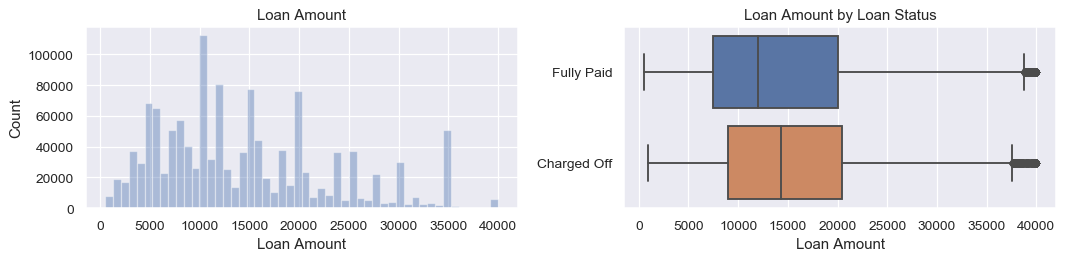

In [1179]:
data_explore("loan_amnt", "Loan Amount", True)

In [1180]:
data.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"261,655.00","15,548.98","8,797.54",900.00,"9,000.00","14,350.00","20,400.00","40,000.00"
Fully Paid,"1,041,952.00","14,132.49","8,651.52",500.00,"7,500.00","12,000.00","20,000.00","40,000.00"


**Interest Rate**

Based on further inference into the data loans had an interest rate of 13% on avergage. Charged off loans seem to occur more at higher interest rates.

In [1181]:
# Information about distribution of interest rate.
data['int_rate'].describe()

count   1,303,607.00
mean           13.26
std             4.76
min             5.31
25%             9.75
50%            12.74
75%            15.99
max            30.99
Name: int_rate, dtype: float64

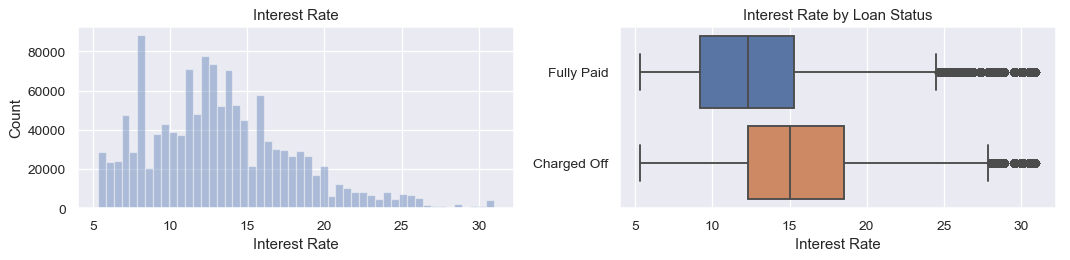

In [1182]:
data_explore("int_rate", "Interest Rate", True)

In [1183]:
data.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"261,655.00",15.71,4.90,5.31,12.29,15.05,18.55,30.99
Fully Paid,"1,041,952.00",12.64,4.52,5.31,9.17,12.29,15.31,30.99


**Installment**

Based on further inference into the data loans had an installment of 400 on avergage. Charged off loans seem to occur at around the same installment rate.

In [1184]:
# Information about distribution of installment.
data['installment'].describe()

count   1,303,607.00
mean          438.08
std           261.06
min             4.93
25%           248.82
50%           375.43
75%           580.45
max         1,719.83
Name: installment, dtype: float64

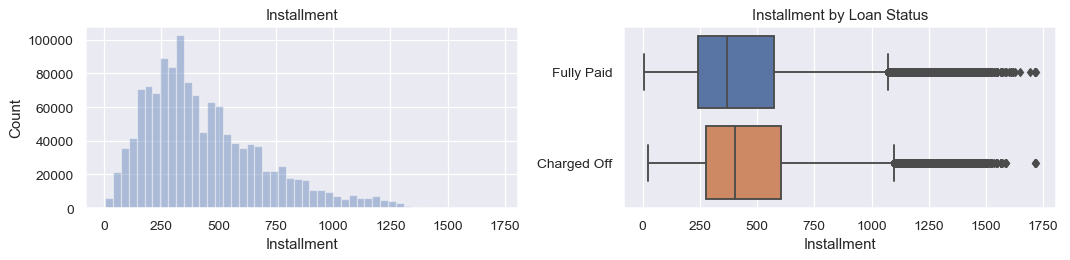

In [1185]:
data_explore("installment", "Installment", True)

In [1186]:
data.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"261,655.00",464.75,262.34,21.62,275.22,402.83,604.14,"1,717.63"
Fully Paid,"1,041,952.00",431.39,260.31,4.93,241.12,368.63,573.06,"1,719.83"


**Grade**

Based on further inference into the data loans had an interest rate of 13% on avergage. Charged off loans seem to occur more at higher interest rates.

In [1187]:
# Information about distribution of grade.
data['grade'].describe()

count     1303607
unique          7
top             B
freq       380152
Name: grade, dtype: object

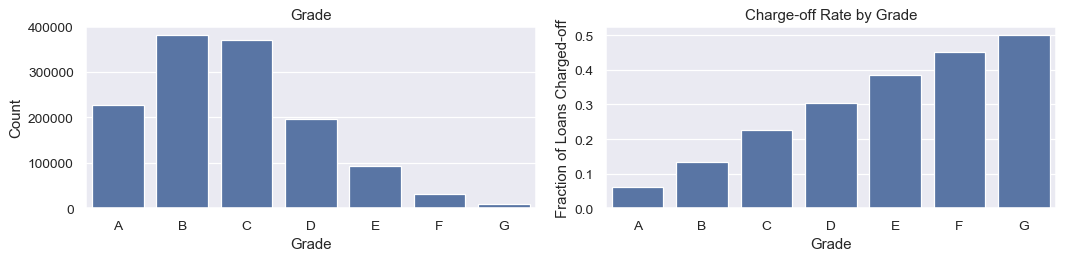

In [1188]:
data_explore("grade", "Grade", False)

In [1189]:
data.groupby('loan_status')['grade'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,261655,7,C,83262
Fully Paid,1041952,7,B,329075


**Employment Title**

Based on further inference into the data most applicants are teachers. Charged off loans seem to occur when managers are the borrows and are paid when teachers are the borrowers. There are toom any unique values for any inference to be made so this feature will be dropped.

In [1190]:
# Information about distribution of employment title.
data['emp_title'].describe()

count     1221028
unique     371435
top       Teacher
freq        20496
Name: emp_title, dtype: object

In [1191]:
data.groupby('loan_status')['emp_title'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,239962,94177,Manager,3974
Fully Paid,981066,311305,Teacher,16666


In [1192]:
data.drop(labels='emp_title', axis=1, inplace=True)

**Employment Length**

Based on further inference into the data loans had most applicants that worked for 1-5 years. Charged off loans seem to occur at the same rate across all employment lenths.

In [1193]:
# Information about distribution of employment length.
data['emp_length'].describe()

count       1303607
unique            3
top       1-5 years
freq         647353
Name: emp_length, dtype: object

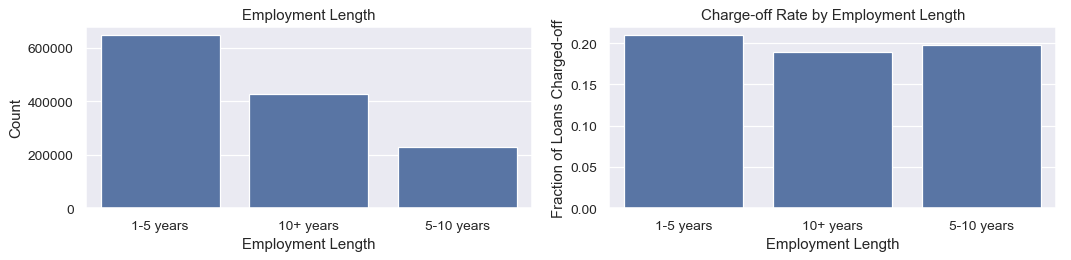

In [1194]:
data_explore("emp_length", "Employment Length", False)

In [1195]:
data.groupby('loan_status')['emp_length'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,261655,3,1-5 years,135714
Fully Paid,1041952,3,1-5 years,511639


**Home Ownership**

Based on further inference into the data loans had most applicants either rent or have a mortgage. Charged off loans seem to occur at similar rates across all home ownerships.

In [1196]:
# Information about distribution of home ownership.
data['home_ownership'].describe()

count      1303607
unique           4
top       MORTGAGE
freq        645496
Name: home_ownership, dtype: object

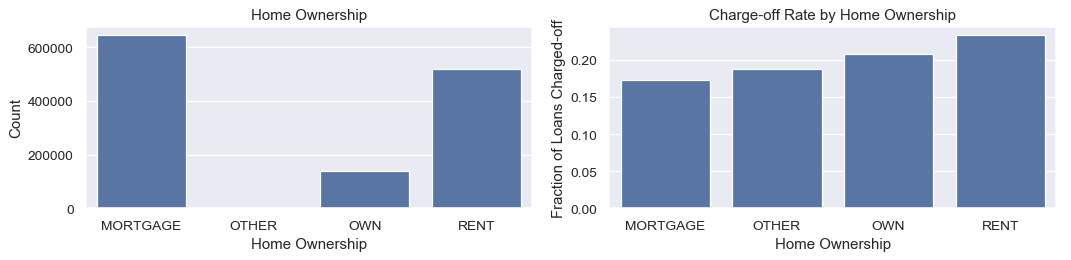

In [1197]:
data_explore("home_ownership", "Home Ownership", False)

In [1198]:
data.groupby('loan_status')['home_ownership'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,261655,4,RENT,120896
Fully Paid,1041952,4,MORTGAGE,533834


**Annual Income**

Based on further inference into the data loans had most had an income of around 76,000. The data is very sparse ranging from 0 to over 10,000,000 and a mean of only 76,000. Due to this the data will be transformed to conform normality. Charged off loans seem to occur when income is lower than those of paid loans with a difference of only 0.04.

In [1199]:
# Information about distribution of annual income.
data['annual_inc'].describe()

count    1,303,607.00
mean        76,158.99
std         70,048.90
min              0.00
25%         45,840.00
50%         65,000.00
75%         90,000.00
max     10,999,200.00
Name: annual_inc, dtype: float64

In [1200]:
data['annual_inc'] = data['annual_inc'].apply(lambda x: np.log10(x+1))

In [1201]:
data['annual_inc'].describe()

count   1,303,607.00
mean            4.81
std             0.25
min             0.00
25%             4.66
50%             4.81
75%             4.95
max             7.04
Name: annual_inc, dtype: float64

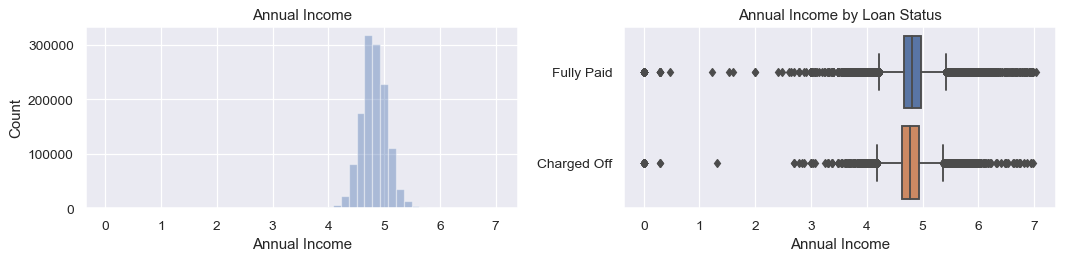

In [1202]:
data_explore("annual_inc", "Annual Income", True)

In [1203]:
data.groupby('loan_status')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"261,655.00",4.78,0.24,0.00,4.63,4.78,4.93,6.98
Fully Paid,"1,041,952.00",4.82,0.25,0.00,4.67,4.81,4.97,7.04


**Purpose**

Based on further inference into the data loans were filed mostly for debt. Although life event was the lowest prevalence almost 25% of those loans were charged off.

In [1204]:
# Information about distribution of loan purposes.
data['purpose'].describe()

count     1303607
unique          4
top          debt
freq      1043295
Name: purpose, dtype: object

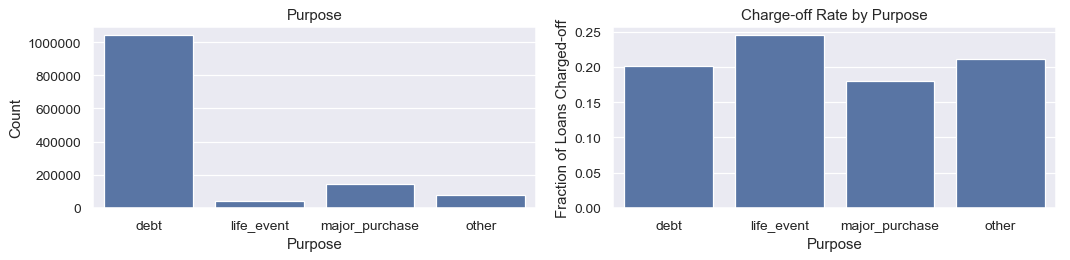

In [1205]:
data_explore("purpose", "Purpose", False)

In [1206]:
data.groupby('loan_status')['purpose'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,261655,4,debt,209685
Fully Paid,1041952,4,debt,833610


**Loan Title**

Too many unique values to infer anything from data so will be dropped. 

In [1207]:
# Information about distribution of loan purposes.
data['title'].describe()

count                1288181
unique                 61678
top       Debt consolidation
freq                  638945
Name: title, dtype: object

In [1208]:
data.groupby('loan_status')['title'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,256926,12045,Debt consolidation,140254
Fully Paid,1031255,53731,Debt consolidation,498691


In [1209]:
data.drop(labels='title', axis=1, inplace=True)

**DTI**

Based on further inference into the data average debt to income (DTI) ratio was 18.26. Those who default on loans seem to be above the average DTI ratio and those who paid off were below. 

In [1210]:
# Information about distribution of loan purposes.
data['dti'].describe()

count   1,303,295.00
mean           18.26
std            10.94
min            -1.00
25%            11.79
50%            17.61
75%            24.04
max           999.00
Name: dti, dtype: float64

Text(0.5, 1.0, 'Debt-to-income Ratio')

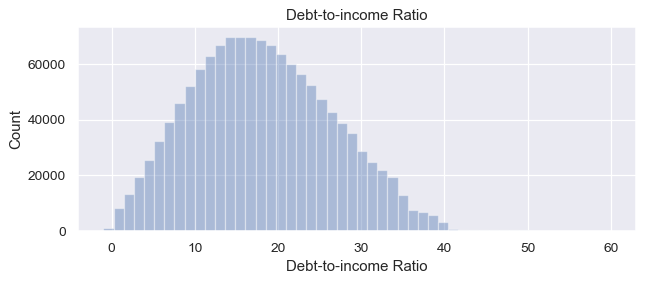

In [1211]:
plt.figure(figsize=(8,3), dpi=90)
sns.distplot(data.loc[data['dti'].notnull() & (data['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

In [1212]:
data.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"261,593.00",20.16,11.29,0.00,13.58,19.77,26.31,999.00
Fully Paid,"1,041,702.00",17.78,10.80,-1.00,11.42,17.09,23.41,999.00


**Earliest Credit Line**

Based on further inference into the data most borrowers earliest credit line was opened in 2000. Those who opened credit lines more recently seem to be charged off more.  

In [1213]:
# Information about distribution of loan purposes.
data['earliest_cr_line'].describe()

count   1,303,607.00
mean        1,998.65
std             7.59
min         1,934.00
25%         1,995.00
50%         2,000.00
75%         2,004.00
max         2,015.00
Name: earliest_cr_line, dtype: float64

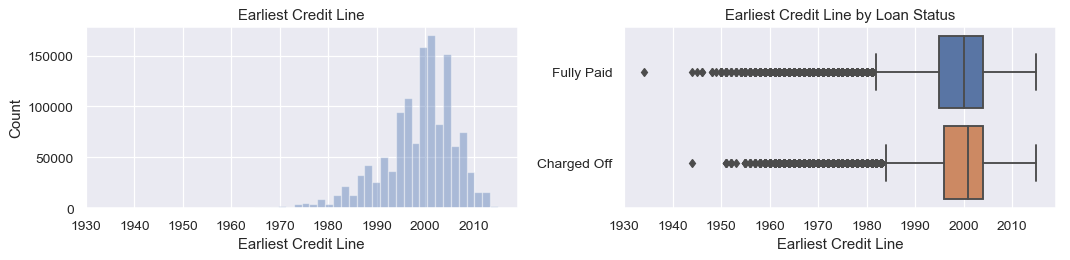

In [1214]:
data_explore("earliest_cr_line", "Earliest Credit Line", True)

In [1215]:
data.groupby('loan_status')['earliest_cr_line'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"261,655.00","1,999.32",7.57,"1,944.00","1,996.00","2,001.00","2,004.00","2,015.00"
Fully Paid,"1,041,952.00","1,998.48",7.59,"1,934.00","1,995.00","2,000.00","2,004.00","2,015.00"


**Open Accounts**

Borrowers seems to have the same number of open accounts whether they defaulted or paid.

In [1216]:
# Information about distribution of loan purposes.
data['open_acc'].describe()

count   1,303,607.00
mean           11.59
std             5.47
min             0.00
25%             8.00
50%            11.00
75%            14.00
max            90.00
Name: open_acc, dtype: float64

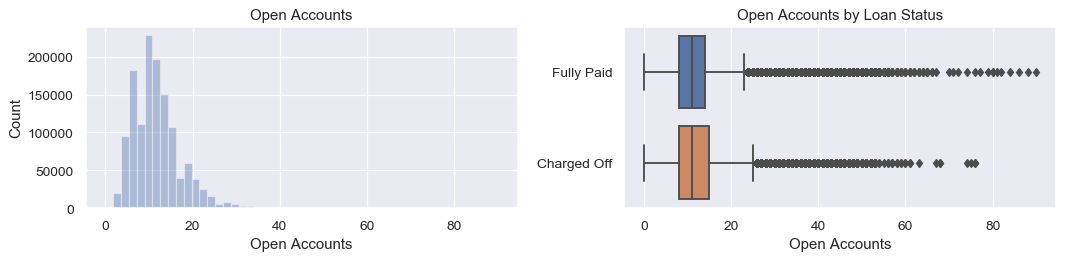

In [1217]:
data_explore("open_acc", "Open Accounts", True)

In [1218]:
data.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"261,655.00",11.91,5.63,0.00,8.00,11.00,15.00,76.00
Fully Paid,"1,041,952.00",11.51,5.42,0.00,8.00,11.00,14.00,90.00


**Public Records**

Seems that there are only outliers for public records this feature wont reveal much. Since in reality it was much more likely that an applicant is not a criminal.

In [1219]:
# Information about distribution of loan purposes.
data['pub_rec'].describe()

count   1,303,607.00
mean            0.22
std             0.60
min             0.00
25%             0.00
50%             0.00
75%             0.00
max            86.00
Name: pub_rec, dtype: float64

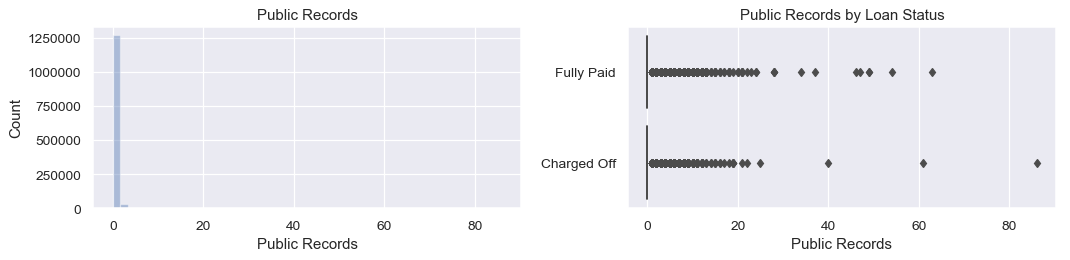

In [1220]:
data_explore("pub_rec", "Public Records", True)

In [1221]:
data.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"261,655.00",0.25,0.66,0.00,0.00,0.00,0.00,86.00
Fully Paid,"1,041,952.00",0.21,0.59,0.00,0.00,0.00,0.00,63.00


**Credit Revolving Balance**

Based on further inference into the data most borrowers on average have a revolving balance of 16,000. The data is very sparse so a log transformation will be used to normalize and get better inference. Revolving balance seems to be the same for both paid and charged off loans.  

In [1222]:
# Information about distribution of loan purposes.
data['revol_bal'].describe()

count   1,303,607.00
mean       16,235.99
std        22,286.29
min             0.00
25%         5,952.00
50%        11,140.00
75%        19,748.00
max     2,904,836.00
Name: revol_bal, dtype: float64

In [1223]:
data['revol_bal'] = data['revol_bal'].apply(lambda x: np.log10(x+1))

In [1224]:
data['revol_bal'].describe()

count   1,303,607.00
mean            3.99
std             0.53
min             0.00
25%             3.77
50%             4.05
75%             4.30
max             6.46
Name: revol_bal, dtype: float64

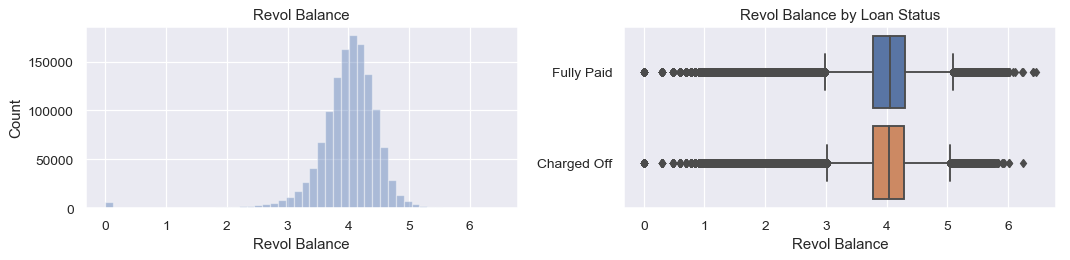

In [1225]:
data_explore("revol_bal", "Revol Balance", True)

In [1226]:
data.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"261,655.00",3.99,0.51,0.00,3.78,4.04,4.28,6.24
Fully Paid,"1,041,952.00",3.99,0.53,0.00,3.77,4.05,4.30,6.46


**Revolving Utilization Rate**

Based on further inference into the data those who charged of have a higher revolving utilization rate than the average.  

In [1227]:
# Information about distribution of loan purposes.
data['revol_util'].describe()

count   1,302,797.00
mean           51.91
std            24.50
min             0.00
25%            33.60
50%            52.30
75%            70.80
max           892.30
Name: revol_util, dtype: float64

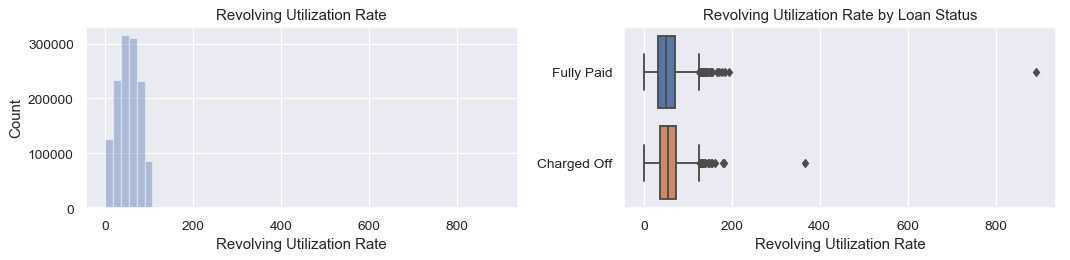

In [1228]:
data_explore("revol_util", "Revolving Utilization Rate", True)

In [1229]:
data.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"261,487.00",54.90,23.83,0.00,37.60,55.70,73.20,366.60
Fully Paid,"1,041,310.00",51.16,24.61,0.00,32.60,51.40,70.10,892.30


**Total Accounts**

Based on further inference into the data total number acocunds is virtually the same for borrowers who defaulted and those who paid.  

In [1230]:
# Information about distribution of loan purposes.
data['total_acc'].describe()

count   1,303,607.00
mean           25.02
std            12.00
min             2.00
25%            16.00
50%            23.00
75%            32.00
max           176.00
Name: total_acc, dtype: float64

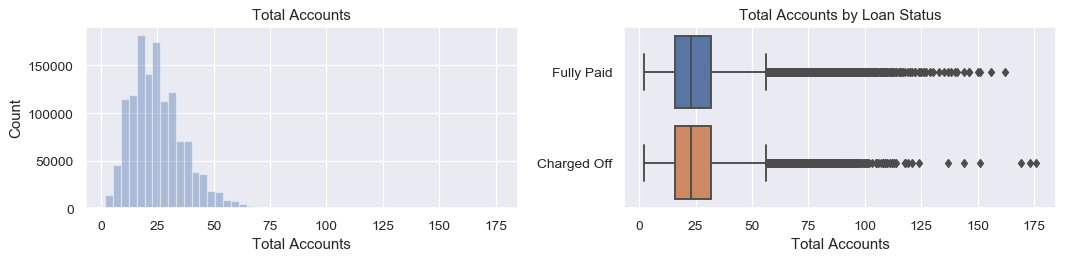

In [1231]:
data_explore("total_acc", "Total Accounts", True)

In [1232]:
data.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"261,655.00",24.75,12.11,2.00,16.00,23.00,32.00,176.00
Fully Paid,"1,041,952.00",25.09,11.96,2.00,16.00,23.00,32.00,162.00


**Application Type**

Based on further inference into the data almost all applications were individual, but almost 25% of joint applications defualted.  

In [1233]:
# Information about distribution of loan purposes.
data['application_type'].describe()

count        1303607
unique             2
top       Individual
freq         1280370
Name: application_type, dtype: object

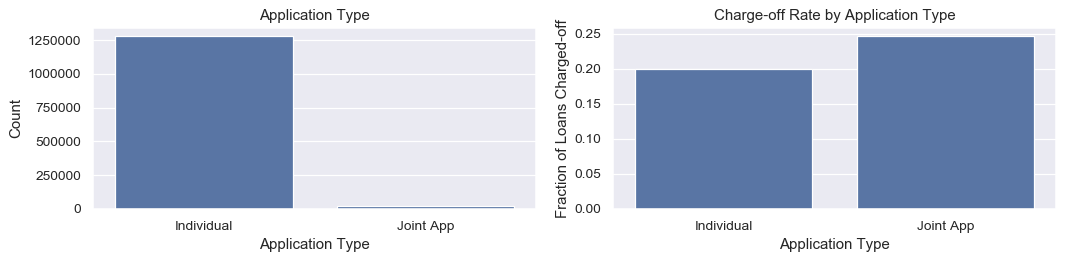

In [1234]:
data_explore("application_type", "Application Type", False)

In [1235]:
data.groupby('loan_status')['application_type'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,261655,2,Individual,255926
Fully Paid,1041952,2,Individual,1024444


**Mortgage Accounts**

Based on further inference into the data most borrowers that default on loans have less mortgage accounts than those who pay off loans.  

In [1236]:
# Information about distribution of loan purposes.
data['mort_acc'].describe()

count   1,256,326.00
mean            1.68
std             2.01
min             0.00
25%             0.00
50%             1.00
75%             3.00
max            51.00
Name: mort_acc, dtype: float64

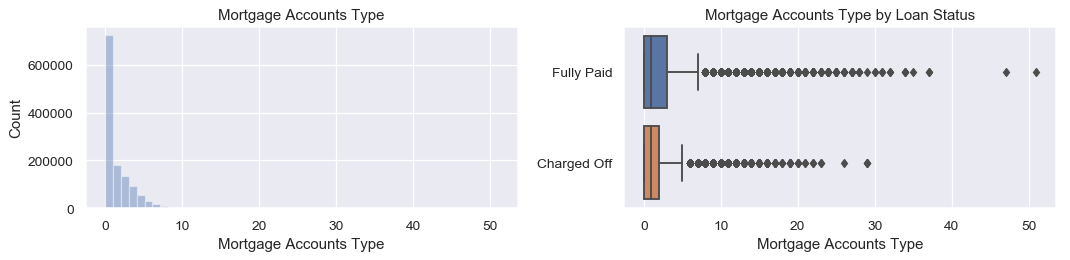

In [1237]:
data_explore("mort_acc", "Mortgage Accounts Type", True)

In [1238]:
data.groupby('loan_status')['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"254,769.00",1.38,1.83,0.00,0.00,1.00,2.00,29.00
Fully Paid,"1,001,557.00",1.75,2.04,0.00,0.00,1.00,3.00,51.00


**Public Recorded Bankruptcies**

Based on further inference into the data essentially all borrowers despite whether the loan was charged off or not had no public recorded bankruptcies.  

In [1239]:
# Information about distribution of loan purposes.
data['pub_rec_bankruptcies'].describe()

count   1,302,910.00
mean            0.13
std             0.38
min             0.00
25%             0.00
50%             0.00
75%             0.00
max            12.00
Name: pub_rec_bankruptcies, dtype: float64

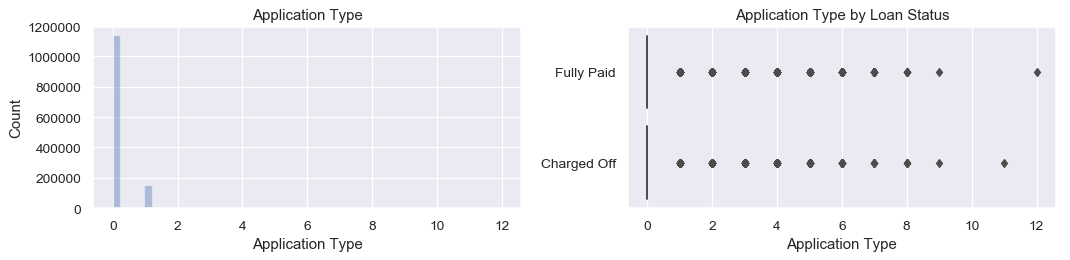

In [1240]:
data_explore("pub_rec_bankruptcies", "Application Type", True)

In [1241]:
data.groupby('loan_status')['pub_rec_bankruptcies'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,"261,537.00",0.15,0.40,0.00,0.00,0.00,0.00,11.00
Fully Paid,"1,041,373.00",0.13,0.37,0.00,0.00,0.00,0.00,12.00


**Region**

Based on further inference into the data most borrowers are form the Southeast, West, and Northeast. Almost all regions had the same amount of loans that defaulted.  

In [1242]:
# Information about distribution of loan purposes.
data['region'].describe()

count       1303607
unique            5
top       SouthEast
freq         314653
Name: region, dtype: object

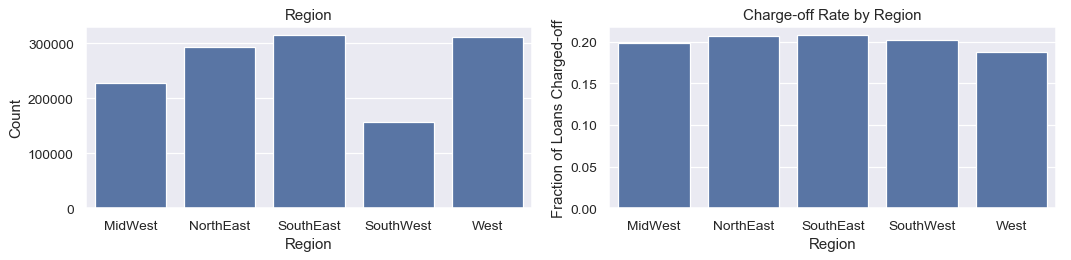

In [1243]:
data_explore("region", "Region", False)

In [1244]:
data.groupby('loan_status')['region'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,261655,5,SouthEast,65460
Fully Paid,1041952,5,West,253076


In [40]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct

In [24]:
# Drop irrelevant features that only apply ot one class.
data.drop(['total_rec_late_fee','last_pymnt_amnt','total_rec_int','debt_settlement_flag','collection_recovery_fee','total_rec_prncp','recoveries', 'zip_code', 'addr_state', 'sub_grade', 'title', 'emp_title', 'last_pymnt_d', 'last_credit_pull_d'], axis=1, inplace=True)

In [25]:
# Drop irrelevant features.
app_data.drop(['zip_code', 'addr_state', 'sub_grade', 'title', 'emp_title'], axis=1, inplace=True)

In [26]:
# Fill in missing numerical columns with the mode of each. 

missing_cols = data.columns[data.isnull().any()].tolist()
missing_cols_app = app_data.columns[app_data.isnull().any()].tolist()

for col in missing_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)
    
for col in missing_cols_app:
    app_data[col].fillna(app_data[col].mode()[0], inplace=True)

In [27]:
# Encode loan status.
def loan_status_encoder(x):
    if (x == 'Fully Paid'):
        return 0
    return 1

data['loan_status'] = data['loan_status'].apply(loan_status_encoder)
app_data['loan_status'] = app_data['loan_status'].apply(loan_status_encoder)

In [28]:
# Convert issue date to datetime
data['issue_d'] = pd.to_datetime(data['issue_d'])
app_data['issue_d'] = pd.to_datetime(app_data['issue_d'])

In [29]:
data.loc[:, data.dtypes == object].columns

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'initial_list_status', 'application_type',
       'hardship_flag', 'disbursement_method', 'region'],
      dtype='object')

In [30]:
app_data.loc[:, app_data.dtypes == object].columns

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'initial_list_status', 'application_type', 'region'],
      dtype='object')

In [31]:
# Encode categorical variables as dummy variables.

data = pd.get_dummies(data, columns=['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'initial_list_status', 'application_type',
       'hardship_flag', 'disbursement_method', 'region'], drop_first=True)

app_data = pd.get_dummies(app_data, columns=['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'initial_list_status', 'application_type', 'region'], drop_first=True)

# Correlations and Significance

In [32]:
corr = data.corr()
corr_app = app_data.corr()

In [444]:
corr['loan_status'].sort_values()

total_pymnt                    -0.318482
total_pymnt_inv                -0.318038
grade_B                        -0.106295
bc_open_to_buy                 -0.077103
avg_cur_bal                    -0.071585
tot_hi_cred_lim                -0.070042
mort_acc                       -0.069613
total_bc_limit                 -0.065104
tot_cur_bal                    -0.063210
mo_sin_rcnt_tl                 -0.049633
mo_sin_rcnt_rev_tl_op          -0.048207
total_rev_hi_lim               -0.047068
mths_since_recent_bc           -0.046954
mo_sin_old_rev_tl_op           -0.046010
annual_inc                     -0.041716
mths_since_recent_inq          -0.033662
mo_sin_old_il_acct             -0.025315
emp_length_10+ years           -0.020749
revol_bal                      -0.019578
region_West                    -0.018738
purpose_major_purchase         -0.018039
pct_tl_nvr_dlq                 -0.014350
num_bc_tl                      -0.013316
total_acc                      -0.011332
emp_length_5-10 

In [445]:
corr_app['loan_status'].sort_values()

grade_B                        -0.106295
bc_open_to_buy                 -0.077103
avg_cur_bal                    -0.071585
mort_acc                       -0.069613
total_bc_limit                 -0.065104
mo_sin_rcnt_tl                 -0.049633
mo_sin_rcnt_rev_tl_op          -0.048207
mths_since_recent_bc           -0.046954
mo_sin_old_rev_tl_op           -0.046010
annual_inc                     -0.041716
mths_since_recent_inq          -0.033662
mo_sin_old_il_acct             -0.025315
emp_length_10+ years           -0.020749
revol_bal                      -0.019578
region_West                    -0.018738
purpose_major_purchase         -0.018039
num_bc_tl                      -0.013316
total_acc                      -0.011332
emp_length_5-10 years          -0.003483
num_rev_accts                  -0.001425
home_ownership_OTHER           -0.000626
region_SouthWest                0.001421
delinq_amnt                     0.002808
home_ownership_OWN              0.005830
purpose_other   

In [33]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [34]:
to_drop

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'total_pymnt_inv',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'tot_hi_cred_lim']

In [35]:
# Data to drop due to multicollinearity
data.drop(['installment','out_prncp', 'out_prncp_inv', 'policy_code', 'num_sats', 'num_rev_tl_bal_gt_0', 'total_pymnt_inv', 'funded_amnt_inv', 'tot_hi_cred_lim'], axis=1, inplace=True)

In [36]:
# Select upper triangle of correlation matrix
upper_app = corr_app.where(np.triu(np.ones(corr_app.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop_app = [column for column in upper_app.columns if any(upper_app[column] > 0.95)]

In [37]:
to_drop_app

['installment']

In [38]:
# Data to drop due to multicollinearity
app_data.drop(['installment'], axis=1, inplace=True)

# Train/Test Split

Converted issue date of loan to datetime object to separate on for test and training. The split will be 80/20 training and test. Split on date in the 0.8 quantile.

Text(0.5, 1.0, 'Number of Loans per Year')

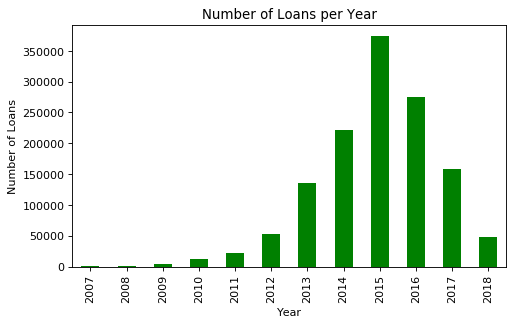

In [180]:
plt.figure(figsize=(7,4), dpi=80)
data['issue_d'].dt.year.value_counts().sort_index().plot.bar(color='green')
plt.xlabel('Year')
plt.ylabel('Number of Loans')
plt.title('Number of Loans per Year')

In [ ]:
data.shape

In [40]:
app_data.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'issue_d', 'loan_status', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
       'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'mths_since_recent_inq', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'pub_rec_bankruptcies',
       'total_bc_limit', 'term_ 60 months', 'grade_B', 'grade_C', 'grade_D',
       'grade_E', 'grade_F', 'grade_G', 'emp_length_10+ years',
       'emp_length_5-10 years', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Verified',
       'purpose_life_event', 'purpose_major_purchase', 'purpose_other',
       'initial_list_status_w', 'application_type_Joint App',
     

In [41]:
data_train = data.loc[data['issue_d'] <  data['issue_d'].quantile(0.80)]
data_test =  data.loc[data['issue_d'] >= data['issue_d'].quantile(0.80)]

data_train_app = app_data.loc[app_data['issue_d'] <  app_data['issue_d'].quantile(0.80)]
data_test_app =  app_data.loc[app_data['issue_d'] >= app_data['issue_d'].quantile(0.80)]

In [42]:
data_test.shape[0] / data.shape[0]

0.2002628092669033

In [43]:
data_test_app.shape[0] / app_data.shape[0]

0.2002628092669033

In [44]:
# Drop issue date from data.
data_train.drop(labels='issue_d', axis=1, inplace=True)
data_test.drop(labels='issue_d', axis=1, inplace=True)
data_train_app.drop(labels='issue_d', axis=1, inplace=True)
data_test_app.drop(labels='issue_d', axis=1, inplace=True)

# Label Imbalance

Subsample majority class so labels balanced in training and testing. 

In [45]:
#Divide by class
class_paid = data_train[data_train['loan_status'] == 0]
class_default = data_train[data_train['loan_status'] == 1]

class_paid_app = data_train_app[data_train_app['loan_status'] == 0]
class_default_app = data_train_app[data_train_app['loan_status'] == 1]

# Class count
paid_count = len(class_paid) 
default_count = len(class_default) 

paid_count_app = len(class_paid_app) 
default_count_app = len(class_default_app) 

Random under-sampling:
1    205149
0    205149
Name: loan_status, dtype: int64
Random under-sampling:
1    205149
0    205149
Name: loan_status, dtype: int64


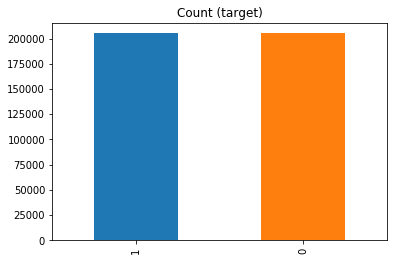

In [46]:
#random sampling
df_class_paid_under = class_paid.sample(default_count)
balanced_data = pd.concat([df_class_paid_under, class_default], axis=0)

print('Random under-sampling:')
print(balanced_data['loan_status'].value_counts())

balanced_data['loan_status'].value_counts().plot(kind='bar', title='Count (target)');


df_class_paid_under_app = class_paid_app.sample(default_count_app)
balanced_data_app = pd.concat([df_class_paid_under_app, class_default_app], axis=0)

print('Random under-sampling:')
print(balanced_data_app['loan_status'].value_counts())

balanced_data_app['loan_status'].value_counts().plot(kind='bar', title='Count (target)');

In [47]:
#Divide by class
class_paid_test = data_test[data_test['loan_status'] == 0]
class_default_test = data_test[data_test['loan_status'] == 1]

class_paid_test_app = data_test_app[data_test_app['loan_status'] == 0]
class_default_test_app = data_test_app[data_test_app['loan_status'] == 1]

# Class count
paid_count_test = len(class_paid_test) 
default_count_test = len(class_default_test) 

paid_count_test_app = len(class_paid_test_app) 
default_count_test_app = len(class_default_test_app) 

Random under-sampling:
1    56506
0    56506
Name: loan_status, dtype: int64
Random under-sampling:
1    56506
0    56506
Name: loan_status, dtype: int64


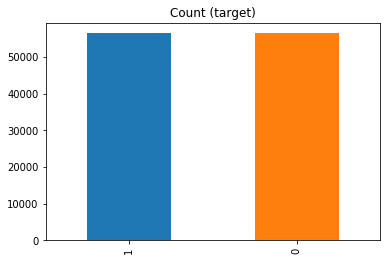

In [48]:
#random sampling
df_class_paid_under_test = class_paid_test.sample(default_count_test)
balanced_data_test = pd.concat([df_class_paid_under_test, class_default_test], axis=0)

print('Random under-sampling:')
print(balanced_data_test['loan_status'].value_counts())

balanced_data_test['loan_status'].value_counts().plot(kind='bar', title='Count (target)');



df_class_paid_under_test_app = class_paid_test_app.sample(default_count_test_app)
balanced_data_test_app = pd.concat([df_class_paid_under_test_app, class_default_test_app], axis=0)

print('Random under-sampling:')
print(balanced_data_test_app['loan_status'].value_counts())

balanced_data_test_app['loan_status'].value_counts().plot(kind='bar', title='Count (target)');

# Separation of features and label.

In [49]:
X_train = balanced_data.drop(['loan_status'], axis=1)
y_train = balanced_data['loan_status']

X_test = balanced_data_test.drop(['loan_status'], axis=1)
y_test = balanced_data_test['loan_status']

In [50]:
X_train_app = balanced_data_app.drop(['loan_status'], axis=1)
y_train_app = balanced_data_app['loan_status']

X_test_app = balanced_data_test_app.drop(['loan_status'], axis=1)
y_test_app = balanced_data_test_app['loan_status']

In [470]:
X_train = data_train.drop(['loan_status'], axis=1)
y_train = data_train['loan_status']

X_test = data_test.drop(['loan_status'], axis=1)
y_test = data_test['loan_status']

In [503]:
X_train_app = data_train_app.drop(['loan_status'], axis=1)
y_train_app = data_train_app['loan_status']

X_test_app = data_test_app.drop(['loan_status'], axis=1)
y_test_app = data_test_app['loan_status']

# Feature Importance

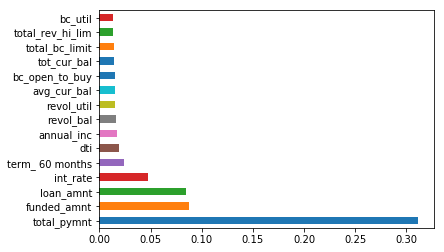

In [475]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(n_estimators=250)
rf.fit(X_train, y_train)

feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')

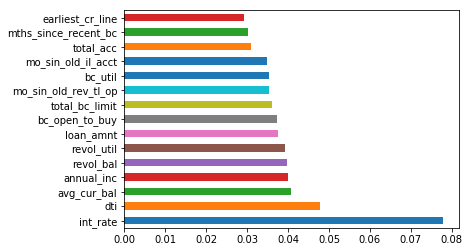

In [476]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(n_estimators=250)
rf.fit(X_train_app, y_train_app)

feat_importances = pd.Series(rf.feature_importances_, index=X_train_app.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Standardization 

Use Z-score standarization to standardize data. Data value scales are varied so need to be put onto same scale so some features do not overpower others. 

In [51]:
from scipy.stats import zscore

X_test = X_test.apply(zscore)
X_test_app = X_test_app.apply(zscore)

In [52]:
from scipy.stats import zscore

X_train = X_train.apply(zscore)
X_train_app = X_train_app.apply(zscore)

# Models

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Gets model metrics.
def get_metrics(model_name, train_test, trues, predictions):
    # Metrics report for logistic regression model.
    report = classification_report(trues, predictions)

    # Confusion matrix for logistic regression model.
    matrix = confusion_matrix(trues, predictions)

    # Accurcy of logistic regression model.
    accuracy = accuracy_score(trues, predictions)

    print("Confusion Matrix for", model_name, " Model")
    print(matrix, "\n")

    print("True Positives: ", matrix[1][1])
    print("False Positives: ", matrix[0][1])
    print("True Negatives: ", matrix[0][0])
    print("False Negatives: ", matrix[1][0])

    print(model_name, train_test, " Accuracy: ", accuracy)
    print(model_name, train_test, " Error: ", 1 - accuracy)

    print("Report for", model_name, " Model")
    print(report)

In [54]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Creates an ROC curve based on a model.
def get_roc(model_name, predictions, trues):

    fpr, tpr, _ = roc_curve(predictions, trues)
    roc_auc = auc(fpr, tpr)


    plt.title('Receiver Operating Characteristic for ' + model_name + ' Model')
    plt.plot(fpr, tpr, 'green', label = ("AUC" +'= %0.2f') % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(penalty = 'l1')

log_model.fit(X_train, y_train)

log_probs_train = log_model.predict_proba(X_train)
log_probs = log_model.predict_proba(X_test)

In [116]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.94 (+/- 0.03)


In [108]:
thresholds = [0.25, 0.5, 0.75, 0.9]

# Runs the logistic regression model with different thresholds. 
for thresh in thresholds:
    predictions_train = (log_probs_train [:,1] >= thresh).astype('int')
    predictions = (log_probs [:,1] >= thresh).astype('int')
    
    print("Logistic Regresion Model with Threshold = ",thresh)
    get_metrics("Logistic Regression", "Train", y_train, predictions_train)
    print("\n")
    get_metrics("Logistic Regression", "Test", y_test, predictions)
    print("\n")

Logistic Regresion Model with Threshold =  0.25
Confusion Matrix for Logistic Regression  Model
[[184817  20332]
 [  9024 196125]] 

True Positives:  196125
False Positives:  20332
True Negatives:  184817
False Negatives:  9024
Logistic Regression Train  Accuracy:  0.9284520031781778
Logistic Regression Train  Error:  0.07154799682182222
Report for Logistic Regression  Model
              precision    recall  f1-score   support

           0       0.95      0.90      0.93    205149
           1       0.91      0.96      0.93    205149

   micro avg       0.93      0.93      0.93    410298
   macro avg       0.93      0.93      0.93    410298
weighted avg       0.93      0.93      0.93    410298



Confusion Matrix for Logistic Regression  Model
[[54702  1804]
 [  539 55967]] 

True Positives:  55967
False Positives:  1804
True Negatives:  54702
False Negatives:  539
Logistic Regression Test  Accuracy:  0.9792676883870739
Logistic Regression Test  Error:  0.020732311612926102
Report for

In [109]:
coefficients = pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(log_model.coef_[0, ])})
coefficients

,Feature,Coefficients
0,loan_amnt,4.225374
1,funded_amnt,53.398443
2,int_rate,3.613821
3,installment,4.329987
4,annual_inc,-4.800068
5,dti,15.175921
6,delinq_2yrs,3.066101
7,earliest_cr_line,-2.632013
8,inq_last_6mths,0.413606
9,open_acc,0.546362


In [ ]:
fpr_log, tpr_log, _ = roc_curve(predictions, y_test)
roc_auc_log = auc(fpr_log, tpr_log)
print("Logistic Regression (0.5) AUC ",  roc_auc_log)

# Logistic Regression Before Application

In [55]:
from sklearn.linear_model import LogisticRegression

log_model_app = LogisticRegression(penalty = 'l1', max_iter=500)

start_log = time.time()
log_model_app.fit(X_train_app, y_train_app)
end_log = time.time()

log_probs_train_app = log_model_app.predict_proba(X_train_app)

start_log_test = time.time()
log_probs_app = log_model_app.predict_proba(X_test_app)
end_log_test = time.time()

print("Time for Logistic Regression train: ", (end_log - start_log))
print("Time for Logistic Regression test: ", (end_log_test - start_log_test))

Time for Logistic Regression train:  12.805015087127686
Time for Logistic Regression test:  0.012660980224609375


In [555]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_model_app, X_train_app, y_train_app, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.63 (+/- 0.05)


In [559]:
thresholds = [0.25, 0.50, 0.75, 0.90]

# Runs the logistic regression model with different thresholds. 
for thresh in thresholds:
    predictions_train_app = (log_probs_train_app [:,1] >= thresh).astype('int')
    predictions_app = (log_probs_app [:,1] >= thresh).astype('int')
    
    print("Logistic Regresion Model with Threshold = ",thresh)
    get_metrics("Logistic Regression", "Train", y_train_app, predictions_train_app)
    print("\n")
    get_metrics("Logistic Regression", "Test", y_test_app, predictions_app)
    print("\n")

Logistic Regresion Model with Threshold =  0.25
Confusion Matrix for Logistic Regression  Model
[[ 39306 165843]
 [  8813 196336]] 

True Positives:  196336
False Positives:  165843
True Negatives:  39306
False Negatives:  8813
Logistic Regression Train  Accuracy:  0.5743191533958245
Logistic Regression Train  Error:  0.4256808466041755
Report for Logistic Regression  Model
              precision    recall  f1-score   support

           0       0.82      0.19      0.31    205149
           1       0.54      0.96      0.69    205149

   micro avg       0.57      0.57      0.57    410298
   macro avg       0.68      0.57      0.50    410298
weighted avg       0.68      0.57      0.50    410298



Confusion Matrix for Logistic Regression  Model
[[10191 46315]
 [ 2252 54254]] 

True Positives:  54254
False Positives:  46315
True Negatives:  10191
False Negatives:  2252
Logistic Regression Test  Accuracy:  0.5702491770785403
Logistic Regression Test  Error:  0.4297508229214597
Report for 

In [557]:
fpr_log_app, tpr_log_app, _ = roc_curve(predictions_app, y_test_app)
roc_auc_log_app = auc(fpr_log_app, tpr_log_app)
print("Logistic Regression (0.5) AUC ",  roc_auc_log_app)

Logistic Regression (0.5) AUC  0.6792425602061313


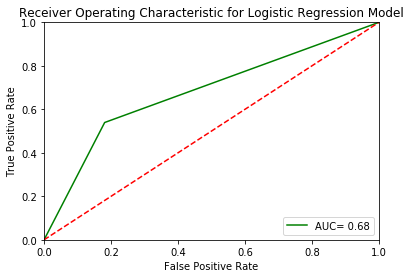

In [558]:
get_roc("Logistic Regression", predictions_app, y_test_app)

In [67]:
coefficients = pd.DataFrame({"Feature":X_train_app.columns,"Coefficients":np.transpose(log_model_app.coef_[0, ])})
coefficients.sort_values('Coefficients')

,Feature,Coefficients
30,total_bc_limit,-0.154836
9,total_acc,-0.120101
11,avg_cur_bal,-0.063163
5,open_acc,-0.053600
19,mort_acc,-0.049389
2,annual_inc,-0.047057
20,mths_since_recent_bc,-0.044826
38,emp_length_10+ years,-0.041276
52,region_West,-0.037536
21,mths_since_recent_inq,-0.028173


# Linear Discriminant Analysis Model

In [110]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

# predict the response
y_lda_pred_train = lda.predict(X_train)
y_lda_pred = lda.predict(X_test)

In [111]:
from sklearn.model_selection import cross_val_score
lda = LinearDiscriminantAnalysis()
scores = cross_val_score(lda, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.88 (+/- 0.06)


In [540]:
get_metrics("LDA", "Train", y_train, y_lda_pred_train)
print("\n")
get_metrics("LDA", "Test", y_test, y_lda_pred)

Confusion Matrix for LDA  Model
[[130379  74770]
 [ 68249 136900]] 

True Positives:  136900
False Positives:  74770
True Negatives:  130379
False Negatives:  68249
LDA Train  Accuracy:  0.6514265241361157
LDA Train  Error:  0.3485734758638843
Report for LDA  Model
              precision    recall  f1-score   support

           0       0.66      0.64      0.65    205149
           1       0.65      0.67      0.66    205149

   micro avg       0.65      0.65      0.65    410298
   macro avg       0.65      0.65      0.65    410298
weighted avg       0.65      0.65      0.65    410298



Confusion Matrix for LDA  Model
[[33163 23343]
 [17606 38900]] 

True Positives:  38900
False Positives:  23343
True Negatives:  33163
False Negatives:  17606
LDA Test  Accuracy:  0.6376579478285492
LDA Test  Error:  0.36234205217145077
Report for LDA  Model
              precision    recall  f1-score   support

           0       0.65      0.59      0.62     56506
           1       0.62      0.69    

In [134]:
fpr_lda, tpr_lda, _ = roc_curve(y_lda_pred, y_test)
roc_auc_lda = auc(fpr_lda, tpr_lda)
print("LDA AUC ",  roc_auc_lda)

LDA AUC  0.936185593488103


# Linear Discriminant Analysis Model Before Acceptance

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_app = LinearDiscriminantAnalysis()

start_lda = time.time()
lda_app.fit(X_train_app, y_train_app)
end_lda = time.time()

# predict the response
y_lda_pred_train_app = lda_app.predict(X_train_app)

start_lda_test = time.time()
y_lda_pred_app = lda_app.predict(X_test_app)
end_lda_test = time.time()

print("Time for LDA train: ", (end_lda - start_lda))
print("Time for LDA test: ", (end_lda_test - start_lda_test))

Time for LDA train:  3.619105815887451
Time for LDA test:  0.007232189178466797


In [566]:
from sklearn.model_selection import cross_val_score
lda = LinearDiscriminantAnalysis()
scores_lda = cross_val_score(lda, X_train_app, y_train_app, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_lda.mean(), scores_lda.std() * 2))

Accuracy: 0.63 (+/- 0.05)


In [580]:
get_metrics("LDA", "Train", y_train_app, y_lda_pred_train_app)
print("\n")
get_metrics("LDA", "Test", y_test_app, y_lda_pred_app)

Confusion Matrix for LDA  Model
[[132407  72742]
 [ 68060 137089]] 

True Positives:  137089
False Positives:  72742
True Negatives:  132407
False Negatives:  68060
LDA Train  Accuracy:  0.6568299138674817
LDA Train  Error:  0.3431700861325183
Report for LDA  Model
              precision    recall  f1-score   support

           0       0.66      0.65      0.65    205149
           1       0.65      0.67      0.66    205149

   micro avg       0.66      0.66      0.66    410298
   macro avg       0.66      0.66      0.66    410298
weighted avg       0.66      0.66      0.66    410298



Confusion Matrix for LDA  Model
[[34316 22190]
 [18325 38181]] 

True Positives:  38181
False Positives:  22190
True Negatives:  34316
False Negatives:  18325
LDA Test  Accuracy:  0.6414982479736665
LDA Test  Error:  0.3585017520263335
Report for LDA  Model
              precision    recall  f1-score   support

           0       0.65      0.61      0.63     56506
           1       0.63      0.68     

In [581]:
fpr_lda_app, tpr_lda_app, _ = roc_curve(y_lda_pred_app, y_test_app)
roc_auc_lda_app = auc(fpr_lda_app, tpr_lda_app)
print("LDA AUC ",  roc_auc_lda_app)

LDA AUC  0.642163364223574


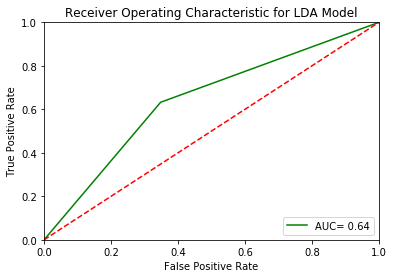

In [582]:
get_roc("LDA", y_lda_pred_app, y_test_app)

# Linear SVM

In [113]:
from sklearn.svm import LinearSVC

In [114]:
lin_svm = LinearSVC()


lin_svm.fit(X_train, y_train)

svm_train = lin_svm.predict(X_train)
svm_test = lin_svm.predict(X_test)

In [115]:
get_metrics("Linear SVM", "Train", y_train, svm_train)
print("\n")
get_metrics("Linear SVM", "Test", y_test, svm_test)

Confusion Matrix for Linear SVM  Model
[[199213   5936]
 [ 19447 185702]] 

True Positives:  185702
False Positives:  5936
True Negatives:  199213
False Negatives:  19447
Linear SVM Train  Accuracy:  0.9381352090431833
Linear SVM Train  Error:  0.06186479095681674
Report for Linear SVM  Model
              precision    recall  f1-score   support

           0       0.91      0.97      0.94    205149
           1       0.97      0.91      0.94    205149

   micro avg       0.94      0.94      0.94    410298
   macro avg       0.94      0.94      0.94    410298
weighted avg       0.94      0.94      0.94    410298



Confusion Matrix for Linear SVM  Model
[[56027   479]
 [ 2080 54426]] 

True Positives:  54426
False Positives:  479
True Negatives:  56027
False Negatives:  2080
Linear SVM Test  Accuracy:  0.9773563869323612
Linear SVM Test  Error:  0.022643613067638846
Report for Linear SVM  Model
              precision    recall  f1-score   support

           0       0.96      0.99    

In [135]:
fpr_svm, tpr_svm, _ = roc_curve(svm_test, y_test)
roc_auc_svm = auc(fpr_svm, tpr_svm)
pri# Linear SVM

from sklearn.svm import LinearSVC

lin_svm = LinearSVC()
lin_svm.fit(X_train, y_train)

svm_train = lin_svm.predict(X_train)
svm_test = lin_svm.predict(X_test)

get_metrics("Linear SVM", "Train", y_train, svm_train)
print("\n")
get_metrics("Linear SVM", "Test", y_test, svm_test)

fpr_svm, tpr_svm, _ = roc_curve(svm_test, y_test)
roc_auc_svm = auc(fpr_svm, tpr_svm)
print("Linear SVM AUC ",  roc_auc_svm)nt("Linear SVM AUC ",  roc_auc_svm)

Linear SVM AUC  0.9777399043141096


# Linear SVM Before Accceptance

In [58]:
from sklearn.svm import LinearSVC

In [112]:
lin_svm_app_1 = LinearSVC(C=1, class_weight={0: 1, 1: 2})
lin_svm_app_5 = LinearSVC(C=5, class_weight={0: 1, 1: 2})
lin_svm_app_10 = LinearSVC(C=10, class_weight={0: 1, 1: 2})

start_svm_1 = time.time()
lin_svm_app_1.fit(X_train_app, y_train_app)
end_svm_1 = time.time()

start_svm_5 = time.time()
lin_svm_app_5.fit(X_train_app, y_train_app)
end_svm_5 = time.time()

start_svm_10 = time.time()
lin_svm_app_10.fit(X_train_app, y_train_app)
end_svm_10 = time.time()

svm_train_app_1 = lin_svm_app_1.predict(X_train_app)
svm_train_app_5 = lin_svm_app_5.predict(X_train_app)
svm_train_app_10 = lin_svm_app_10.predict(X_train_app)

start_svm_test_1 = time.time()
svm_test_app_1 = lin_svm_app_1.predict(X_test_app)
end_svm_test_1 = time.time()

start_svm_test_5 = time.time()
svm_test_app_5 = lin_svm_app_5.predict(X_test_app)
end_svm_test_5 = time.time()

start_svm_test_10 = time.time()
svm_test_app_10 = lin_svm_app_10.predict(X_test_app)
end_svm_test_10 = time.time()

print("Time for SVM (1) train: ", (end_svm_1 - start_svm_1))
print("Time for SVM (1) test: ", (end_svm_test_1 - start_svm_test_1))
print("Time for SVM (5) train: ", (end_svm_5 - start_svm_5))
print("Time for SVM (5) test: ", (end_svm_test_5 - start_svm_test_5))
print("Time for SVM (10) train: ", (end_svm_10 - start_svm_10))
print("Time for SVM (10) test: ", (end_svm_test_10 - start_svm_test_10))

Time for SVM (1) train:  240.85309505462646
Time for SVM (1) test:  0.009312152862548828
Time for SVM (5) train:  237.451012134552
Time for SVM (5) test:  0.00893092155456543
Time for SVM (10) train:  245.0142810344696
Time for SVM (10) test:  0.008076667785644531


In [113]:
get_metrics("Linear SVM (1)", "Train", y_train_app, svm_train_app_1)
print("\n")
get_metrics("Linear SVM (1)", "Test", y_test_app, svm_test_app_1)

get_metrics("Linear SVM (5)", "Train", y_train_app, svm_train_app_5)
print("\n")
get_metrics("Linear SVM (5)", "Test", y_test_app, svm_test_app_5)

get_metrics("Linear SVM (10)", "Train", y_train_app, svm_train_app_10)
print("\n")
get_metrics("Linear SVM (10)", "Test", y_test_app, svm_test_app_10)

Confusion Matrix for Linear SVM (1)  Model
[[ 66204 138945]
 [ 20009 185140]] 

True Positives:  185140
False Positives:  138945
True Negatives:  66204
False Negatives:  20009
Linear SVM (1) Train  Accuracy:  0.6125888988003841
Linear SVM (1) Train  Error:  0.38741110119961586
Report for Linear SVM (1)  Model
              precision    recall  f1-score   support

           0       0.77      0.32      0.45    205149
           1       0.57      0.90      0.70    205149

   micro avg       0.61      0.61      0.61    410298
   macro avg       0.67      0.61      0.58    410298
weighted avg       0.67      0.61      0.58    410298



Confusion Matrix for Linear SVM (1)  Model
[[16432 40074]
 [ 5058 51448]] 

True Positives:  51448
False Positives:  40074
True Negatives:  16432
False Negatives:  5058
Linear SVM (1) Test  Accuracy:  0.600644179379181
Linear SVM (1) Test  Error:  0.399355820620819
Report for Linear SVM (1)  Model
              precision    recall  f1-score   support

      

In [114]:
fpr_svm, tpr_svm, _ = roc_curve(svm_test_app_5, y_test_app)
roc_auc_svm = auc(fpr_svm, tpr_svm)
print("Linear SVM AUC ",  roc_auc_svm)

Linear SVM AUC  0.6406547541995752


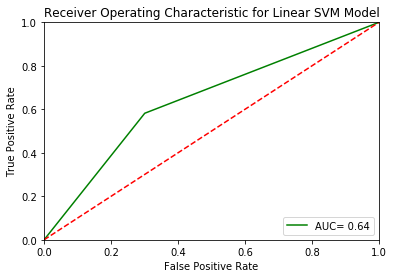

In [116]:
get_roc("Linear SVM", svm_test_app_5, y_test_app)

# Random Forest Model

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rfm_10 = RandomForestClassifier(n_estimators=10)
rfm_10.fit(X_train, y_train)

rfm_50 = RandomForestClassifier(n_estimators=50)
rfm_50.fit(X_train, y_train)

rfm_100 = RandomForestClassifier(n_estimators=100)
rfm_100.fit(X_train, y_train)

rfm_250 = RandomForestClassifier(n_estimators=250)
rfm_250.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [132]:
predictions_rfm_10_train = rfm_10.predict(X_train)
predictions_rfm_50_train = rfm_50.predict(X_train)
predictions_rfm_100_train = rfm_100.predict(X_train)
predictions_rfm_250_train = rfm_250.predict(X_train)
predictions_rfm_10_test = rfm_10.predict(X_test)
predictions_rfm_50_test = rfm_50.predict(X_test)
predictions_rfm_100_test = rfm_100.predict(X_test)
predictions_rfm_250_test = rfm_250.predict(X_test)

In [133]:
print("Random Forest 10 Train Metrics", "\n")
get_metrics("RFM 10", "Train", y_train, predictions_rfm_10_train)
print("\n")
print("Random Forest 10 Test Metrics", "\n")
get_metrics("RFM 10", "Test", y_test, predictions_rfm_10_test)
print("\n")

print("Random Forest 50 Train Metrics", "\n")
get_metrics("RFM 50", "Train", y_train, predictions_rfm_50_train)
print("\n")
print("Random Forest 50 Test Metrics", "\n")
get_metrics("RFM 50", "Test", y_test, predictions_rfm_50_test)
print("\n")

print("Random Forest 100 Train Metrics", "\n")
get_metrics("RFM 100", "Train", y_train, predictions_rfm_100_train)
print("\n")
print("Random Forest 100 Test Metrics", "\n")
get_metrics("RFM 100", "Test", y_test, predictions_rfm_100_test)
print("\n")

print("Random Forest 250 Train Metrics", "\n")
get_metrics("RFM 250", "Train", y_train, predictions_rfm_250_train)
print("\n")
print("Random Forest 250 Test Metrics", "\n")
get_metrics("RFM 250", "Test", y_test, predictions_rfm_250_test)

Random Forest 10 Train Metrics 

Confusion Matrix for RFM 10  Model
[[205092     57]
 [  1828 203321]] 

True Positives:  203321
False Positives:  57
True Negatives:  205092
False Negatives:  1828
RFM 10 Train  Accuracy:  0.995405778239231
RFM 10 Train  Error:  0.004594221760768957
Report for RFM 10  Model
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    205149
           1       1.00      0.99      1.00    205149

   micro avg       1.00      1.00      1.00    410298
   macro avg       1.00      1.00      1.00    410298
weighted avg       1.00      1.00      1.00    410298



Random Forest 10 Test Metrics 

Confusion Matrix for RFM 10  Model
[[53141  3365]
 [ 3927 52579]] 

True Positives:  52579
False Positives:  3365
True Negatives:  53141
False Negatives:  3927
RFM 10 Test  Accuracy:  0.9354758786677521
RFM 10 Test  Error:  0.06452412133224794
Report for RFM 10  Model
              precision    recall  f1-score   support

       

In [136]:
fpr_rfm, tpr_rfm, _ = roc_curve(predictions_rfm_250_test, y_test)
roc_auc_rfm = auc(fpr_rfm, tpr_rfm)
print("Random Forest (250) AUC ",  roc_auc_rfm)

Random Forest (250) AUC  0.9879817193491379


# Random Forest Model Before Acceptance

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rfm_10_app = RandomForestClassifier(n_estimators=10, oob_score=True, max_depth=10, max_features=35)

start_10 = time.time()
rfm_10_app.fit(X_train_app, y_train_app)
end_10 = time.time()

rfm_50_app = RandomForestClassifier(n_estimators=50, oob_score=True, max_depth=10, max_features=35)

start_50 = time.time()
rfm_50_app.fit(X_train_app, y_train_app)
end_50 = time.time()

rfm_100_app = RandomForestClassifier(n_estimators=100, oob_score=True, max_depth=10, max_features=35)

start_100 = time.time()
rfm_100_app.fit(X_train_app, y_train_app)
end_100 = time.time()

rfm_250_app = RandomForestClassifier(n_estimators=250, oob_score=True, max_depth=10, max_features=35)

start_250 = time.time()
rfm_250_app.fit(X_train_app, y_train_app)
end_250 = time.time()


print("Time for 10 train: ", (end_10 - start_10))
print("Time for 50 train: ", (end_50 - start_50))
print("Time for 100 train: ", (end_100 - start_100))
print("Time for 250 train: ", (end_250 - start_250))

Time for 10 train:  41.40232610702515
Time for 50 train:  188.63707304000854
Time for 100 train:  353.59833884239197
Time for 250 train:  880.9357671737671


In [62]:
predictions_rfm_10_train_app = rfm_10_app.predict(X_train_app)
predictions_rfm_50_train_app = rfm_50_app.predict(X_train_app)
predictions_rfm_100_train_app = rfm_100_app.predict(X_train_app)
predictions_rfm_250_train_app = rfm_250_app.predict(X_train_app)

start_10_test = time.time()
predictions_rfm_10_test_app = rfm_10_app.predict(X_test_app)
end_10_test = time.time()

start_50_test = time.time()
predictions_rfm_50_test_app = rfm_50_app.predict(X_test_app)
end_50_test = time.time()

start_100_test = time.time()
predictions_rfm_100_test_app = rfm_100_app.predict(X_test_app)
end_100_test = time.time()

start_250_test = time.time()
predictions_rfm_250_test_app = rfm_250_app.predict(X_test_app)
end_250_test = time.time()


print("Time for 10 test: ", (end_10_test - start_10_test))
print("Time for 50 test: ", (end_50_test - start_50_test))
print("Time for 100 test: ", (end_100_test - start_100_test))
print("Time for 250 test: ", (end_250_test - start_250_test))

Time for 10 test:  0.17282509803771973
Time for 50 test:  0.7444827556610107
Time for 100 test:  1.3869998455047607
Time for 250 test:  3.495119094848633


In [63]:
print("Random Forest 10 Train Metrics", "\n")
get_metrics("RFM 10", "Train", y_train_app, predictions_rfm_10_train_app)
print("\n")
print("Random Forest 10 Test Metrics", "\n")
get_metrics("RFM 10", "Test", y_test_app, predictions_rfm_10_test_app)
print("\n")

print("Random Forest 50 Train Metrics", "\n")
get_metrics("RFM 50", "Train", y_train_app, predictions_rfm_50_train_app)
print("\n")
print("Random Forest 50 Test Metrics", "\n")
get_metrics("RFM 50", "Test", y_test_app, predictions_rfm_50_test_app)
print("\n")

print("Random Forest 100 Train Metrics", "\n")
get_metrics("RFM 100", "Train", y_train_app, predictions_rfm_100_train_app)
print("\n")
print("Random Forest 100 Test Metrics", "\n")
get_metrics("RFM 100", "Test", y_test_app, predictions_rfm_100_test_app)
print("\n")

print("Random Forest 250 Train Metrics", "\n")
get_metrics("RFM 250", "Train", y_train_app, predictions_rfm_250_train_app)
print("\n")
print("Random Forest 250 Test Metrics", "\n")
get_metrics("RFM 250", "Test", y_test_app, predictions_rfm_250_test_app)

Random Forest 10 Train Metrics 

Confusion Matrix for RFM 10  Model
[[135409  69740]
 [ 64237 140912]] 

True Positives:  140912
False Positives:  69740
True Negatives:  135409
False Negatives:  64237
RFM 10 Train  Accuracy:  0.673464165070266
RFM 10 Train  Error:  0.32653583492973404
Report for RFM 10  Model
              precision    recall  f1-score   support

           0       0.68      0.66      0.67    205149
           1       0.67      0.69      0.68    205149

   micro avg       0.67      0.67      0.67    410298
   macro avg       0.67      0.67      0.67    410298
weighted avg       0.67      0.67      0.67    410298



Random Forest 10 Test Metrics 

Confusion Matrix for RFM 10  Model
[[34701 21805]
 [19417 37089]] 

True Positives:  37089
False Positives:  21805
True Negatives:  34701
False Negatives:  19417
RFM 10 Test  Accuracy:  0.6352422751566206
RFM 10 Test  Error:  0.3647577248433794
Report for RFM 10  Model
              precision    recall  f1-score   support

   

In [723]:
fpr_rfm_app, tpr_rfm_app, _ = roc_curve(predictions_rfm_250_test_app, y_test_app)
roc_auc_rfm_app = auc(fpr_rfm_app, tpr_rfm_app)
print("Random Forest (250) AUC ",  roc_auc_rfm_app)

Random Forest (250) AUC  0.6264181863088442


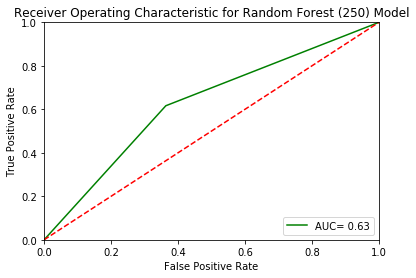

In [724]:
get_roc("Random Forest (250)", predictions_rfm_250_test_app, y_test_app)

# Adaboost Model

In [129]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

bdt_10 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                         n_estimators=10)
bdt_10.fit(X_train, y_train)

bdt_50 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                         n_estimators=50)
bdt_50.fit(X_train, y_train)

bdt_100 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                         n_estimators=100)
bdt_100.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [130]:
predictions_bdt_10_train = bdt_10.predict(X_train)
predictions_bdt_10_test = bdt_10.predict(X_test)
predictions_bdt_50_train = bdt_50.predict(X_train)
predictions_bdt_50_test = bdt_50.predict(X_test)
predictions_bdt_100_train = bdt_100.predict(X_train)
predictions_bdt_100_test = bdt_100.predict(X_test)

In [131]:
print("Boosted Decision Tree 10 Train Metrics", "\n")
get_metrics("BDT 10", "Train", y_train, predictions_bdt_10_train)
print("Boosted Decision Tree 10 Test Metrics", "\n")
get_metrics("BDT 10", "Test", y_test, predictions_bdt_10_test)
print("\n")

print("Boosted Decision Tree 50 Train Metrics", "\n")
get_metrics("BDT 50", "Train", y_train, predictions_bdt_50_train)
print("Boosted Decision Tree 50 Test Metrics", "\n")
get_metrics("BDT 50", "Test", y_test, predictions_bdt_50_test)
print("\n")

print("Boosted Decision Tree 100 Train Metrics", "\n")
get_metrics("BDT 100", "Train", y_train, predictions_bdt_100_train)
print("Boosted Decision Tree 100 Test Metrics", "\n")
get_metrics("BDT 100", "Test", y_test, predictions_bdt_100_test)

Boosted Decision Tree 10 Train Metrics 

Confusion Matrix for BDT 10  Model
[[197097   8052]
 [ 15775 189374]] 

True Positives:  189374
False Positives:  8052
True Negatives:  197097
False Negatives:  15775
BDT 10 Train  Accuracy:  0.9419275745921257
BDT 10 Train  Error:  0.05807242540787427
Report for BDT 10  Model
              precision    recall  f1-score   support

           0       0.93      0.96      0.94    205149
           1       0.96      0.92      0.94    205149

   micro avg       0.94      0.94      0.94    410298
   macro avg       0.94      0.94      0.94    410298
weighted avg       0.94      0.94      0.94    410298

Boosted Decision Tree 10 Test Metrics 

Confusion Matrix for BDT 10  Model
[[56046   460]
 [ 1272 55234]] 

True Positives:  55234
False Positives:  460
True Negatives:  56046
False Negatives:  1272
BDT 10 Test  Accuracy:  0.9846741938909143
BDT 10 Test  Error:  0.015325806109085738
Report for BDT 10  Model
              precision    recall  f1-score  

In [137]:
fpr_bst, tpr_bst, _ = roc_curve(predictions_bdt_100_test, y_test)
roc_auc_bst = auc(fpr_bst, tpr_bst)
print("Adaboose (100# Adaboost Model

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

bdt_10 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                         n_estimators=10)
bdt_10.fit(X_train, y_train)

bdt_50 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                         n_estimators=50)
bdt_50.fit(X_train, y_train)

bdt_100 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                         n_estimators=100)
bdt_100.fit(X_train, y_train)

predictions_bdt_10_train = bdt_10.predict(X_train)
predictions_bdt_10_test = bdt_10.predict(X_test)
predictions_bdt_50_train = bdt_50.predict(X_train)
predictions_bdt_50_test = bdt_50.predict(X_test)
predictions_bdt_100_train = bdt_100.predict(X_train)
predictions_bdt_100_test = bdt_100.predict(X_test)

print("Boosted Decision Tree 10 Train Metrics", "\n")
get_metrics("BDT 10", "Train", y_train, predictions_bdt_10_train)
print("Boosted Decision Tree 10 Test Metrics", "\n")
get_metrics("BDT 10", "Test", y_test, predictions_bdt_10_test)
print("\n")

print("Boosted Decision Tree 50 Train Metrics", "\n")
get_metrics("BDT 50", "Train", y_train, predictions_bdt_50_train)
print("Boosted Decision Tree 50 Test Metrics", "\n")
get_metrics("BDT 50", "Test", y_test, predictions_bdt_50_test)
print("\n")

print("Boosted Decision Tree 100 Train Metrics", "\n")
get_metrics("BDT 100", "Train", y_train, predictions_bdt_100_train)
print("Boosted Decision Tree 100 Test Metrics", "\n")
get_metrics("BDT 100", "Test", y_test, predictions_bdt_100_test)

fpr_bst, tpr_bst, _ = roc_curve(predictions_bdt_100_test, y_test)
roc_auc_bst = auc(fpr_bst, tpr_bst)
print("Adaboose (100) AUC ",  roc_auc_bst)) AUC ",  roc_auc_bst)

Random Forest (250) AUC  0.9883181808849417


# Adaboost Model Before Acceptance

In [83]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

bdt_10_app = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, max_features=35),
                         n_estimators=10)

start_10_bdt = time.time()
bdt_10_app.fit(X_train_app, y_train_app)
end_10_bdt = time.time()

bdt_50_app = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, max_features=35),
                         n_estimators=50)

start_50_bdt = time.time()
bdt_50_app.fit(X_train_app, y_train_app)
end_50_bdt = time.time()

bdt_100_app = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, max_features=35),
                         n_estimators=100)

start_100_bdt = time.time()
bdt_100_app.fit(X_train_app, y_train_app)
end_100_bdt = time.time()

print("Time for 10 train: ", (end_10_bdt - start_10_bdt))
print("Time for 50 train: ", (end_50_bdt - start_50_bdt))
print("Time for 100 trian: ", (end_100_bdt - start_100_bdt))

Time for 10 train:  61.18309807777405
Time for 50 train:  288.97381591796875
Time for 100 trian:  583.9286870956421


In [84]:
predictions_bdt_10_train_app = bdt_10_app.predict(X_train_app)

start_10_bdt_test = time.time()
predictions_bdt_10_test_app = bdt_10_app.predict(X_test_app)
end_10_bdt_test = time.time()

predictions_bdt_50_train_app = bdt_50_app.predict(X_train_app)

start_50_bdt_test = time.time()
predictions_bdt_50_test_app = bdt_50_app.predict(X_test_app)
end_50_bdt_test = time.time()

predictions_bdt_100_train_app = bdt_100_app.predict(X_train_app)

start_100_bdt_test = time.time()
predictions_bdt_100_test_app = bdt_100_app.predict(X_test_app)
end_100_bdt_test = time.time()

print("Time for 10 test: ", (end_10_bdt_test - start_10_bdt_test))
print("Time for 50 test: ", (end_50_bdt_test - start_50_bdt_test))
print("Time for 100 test: ", (end_100_bdt_test - start_100_bdt_test))

Time for 10 test:  0.1865549087524414
Time for 50 test:  0.6868469715118408
Time for 100 test:  1.4019739627838135


In [85]:
print("Boosted Decision Tree 10 Train Metrics", "\n")
get_metrics("BDT 10", "Train", y_train_app, predictions_bdt_10_train_app)
print("Boosted Decision Tree 10 Test Metrics", "\n")
get_metrics("BDT 10", "Test", y_test_app, predictions_bdt_10_test_app)
print("\n")

print("Boosted Decision Tree 50 Train Metrics", "\n")
get_metrics("BDT 50", "Train", y_train_app, predictions_bdt_50_train_app)
print("Boosted Decision Tree 50 Test Metrics", "\n")
get_metrics("BDT 50", "Test", y_test_app, predictions_bdt_50_test_app)
print("\n")

print("Boosted Decision Tree 100 Train Metrics", "\n")
get_metrics("BDT 100", "Train", y_train_app, predictions_bdt_100_train_app)
print("Boosted Decision Tree 100 Test Metrics", "\n")
get_metrics("BDT 100", "Test", y_test_app, predictions_bdt_100_test_app)

Boosted Decision Tree 10 Train Metrics 

Confusion Matrix for BDT 10  Model
[[142346  62803]
 [ 60242 144907]] 

True Positives:  144907
False Positives:  62803
True Negatives:  142346
False Negatives:  60242
BDT 10 Train  Accuracy:  0.7001082140298027
BDT 10 Train  Error:  0.2998917859701973
Report for BDT 10  Model
              precision    recall  f1-score   support

           0       0.70      0.69      0.70    205149
           1       0.70      0.71      0.70    205149

   micro avg       0.70      0.70      0.70    410298
   macro avg       0.70      0.70      0.70    410298
weighted avg       0.70      0.70      0.70    410298

Boosted Decision Tree 10 Test Metrics 

Confusion Matrix for BDT 10  Model
[[33560 22946]
 [19475 37031]] 

True Positives:  37031
False Positives:  22946
True Negatives:  33560
False Negatives:  19475
BDT 10 Test  Accuracy:  0.6246327823593955
BDT 10 Test  Error:  0.37536721764060454
Report for BDT 10  Model
              precision    recall  f1-score

In [95]:
fpr_bst_app, tpr_bst_app, _ = roc_curve(predictions_bdt_10_test_app, y_test_app)
roc_auc_bst_app = auc(fpr_bst_app, tpr_bst_app)
print("Adaboost (10) AUC ",  roc_auc_bst_app)

Adaboost (10) AUC  0.6251048391025616


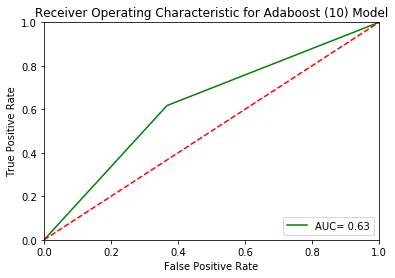

In [94]:
get_roc("Adaboost (10)", predictions_bdt_10_test_app, y_test_app)

# Neural Network Model

In [70]:
import numpy as np
import keras
import keras.backend as K
from keras.layers import Input, Dense, Activation, ReLU, BatchNormalization, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [71]:
def plot(models, labels, feature):
    if (feature == "loss"):
        for i, model in enumerate(models):
            loss_values = model.history['loss']
            epochs = range(1, len(loss_values)+1)

            plt.plot(epochs, loss_values, label=labels[i])
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend()

            plt.show()
    
    if (feature == "accuracy"):
        for i, model in enumerate(models):
            loss_values = model.history['acc']
            epochs = range(1, len(loss_values)+1)

            plt.plot(epochs, loss_values, label=labels[i])
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.legend()

    plt.show()

In [124]:
model = Sequential()

model.add(Dense(64, input_dim = len(X_train.columns), activation = "relu", name="input"))
model.add(Dense(32, activation = "relu", name="hidden"))
model.add(Dense(2, activation = "sigmoid", name="classification"))

Instructions for updating:
Colocations handled automatically by placer.


In [125]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [126]:
from keras.utils import np_utils
y_train_nn = np_utils.to_categorical(y_train, 2)
y_test_nn = np_utils.to_categorical(y_test, 2)

In [127]:
model_metrics = model.fit(X_train, y_train_nn, batch_size = 64, epochs=35)

Instructions for updating:
Use tf.cast instead.
Epoch 1/35
410298/410298 [==============================] - 7s 17us/step - loss: 0.5248 - acc: 0.7354
Epoch 2/35
410298/410298 [==============================] - 8s 18us/step - loss: 0.2247 - acc: 0.9257
Epoch 3/35
410298/410298 [==============================] - 8s 18us/step - loss: 0.1849 - acc: 0.9384
Epoch 4/35
410298/410298 [==============================] - 7s 16us/step - loss: 0.1663 - acc: 0.9426
Epoch 5/35
410298/410298 [==============================] - 7s 18us/step - loss: 0.1562 - acc: 0.9454
Epoch 6/35
410298/410298 [==============================] - 7s 16us/step - loss: 0.1500 - acc: 0.9468
Epoch 7/35
410298/410298 [==============================] - 7s 17us/step - loss: 0.1450 - acc: 0.9476
Epoch 8/35
410298/410298 [==============================] - 7s 17us/step - loss: 0.1417 - acc: 0.9483
Epoch 9/35
410298/410298 [==============================] - 7s 17us/step - loss: 0.1390 - acc: 0.9489
Epoch 10/35
410298/410298 [=======

In [128]:
model.evaluate(X_test, y_test_nn)

113012/113012 [==============================] - 1s 9us/step


[0.029793698474754715, 0.9929520758857466]

In [34]:
model_preds = model.predict(X_test_sub)

# Neural Network Model Before Acceptance

In [72]:
model_app = Sequential()

model_app.add(Dense(45, input_dim = len(X_train_app.columns), activation = "relu", name="input"))
model_app.add(Dense(28, activation = "relu", name="hidden"))
model_app.add(Dense(2, activation = "sigmoid", name="classification"))

Instructions for updating:
Colocations handled automatically by placer.


In [73]:
model_app.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [74]:
from keras.utils import np_utils
y_train_nn_app = np_utils.to_categorical(y_train_app, 2)
y_test_nn_app = np_utils.to_categorical(y_test_app, 2)

In [75]:
model_metrics_app = model_app.fit(X_train_app, y_train_nn_app, batch_size = 32, epochs=35)

Instructions for updating:
Use tf.cast instead.
Epoch 1/35
410298/410298 [==============================] - 11s 26us/step - loss: 0.6265 - acc: 0.6477
Epoch 2/35
410298/410298 [==============================] - 10s 25us/step - loss: 0.6161 - acc: 0.6580
Epoch 3/35
410298/410298 [==============================] - 10s 25us/step - loss: 0.6143 - acc: 0.6592
Epoch 4/35
410298/410298 [==============================] - 10s 25us/step - loss: 0.6133 - acc: 0.6600
Epoch 5/35
410298/410298 [==============================] - 11s 26us/step - loss: 0.6125 - acc: 0.6608
Epoch 6/35
410298/410298 [==============================] - 14s 33us/step - loss: 0.6119 - acc: 0.6614
Epoch 7/35
410298/410298 [==============================] - 12s 30us/step - loss: 0.6113 - acc: 0.6618
Epoch 8/35
410298/410298 [==============================] - 11s 27us/step - loss: 0.6108 - acc: 0.6623
Epoch 9/35
410298/410298 [==============================] - 10s 25us/step - loss: 0.6105 - acc: 0.6627
Epoch 10/35
410298/410298

In [76]:
model_app.evaluate(X_test_app, y_test_nn_app)

113012/113012 [==============================] - 1s 10us/step


[0.6281818393137258, 0.6448695713687322]

In [77]:
model_preds_app = model_app.predict(X_test_app)

In [79]:
get_metrics("FFNN", "Test", y_test_nn_app.argmax(axis=1), model_preds_app.argmax(axis=1))

Confusion Matrix for FFNN  Model
[[34622 21884]
 [18241 38265]] 

True Positives:  38265
False Positives:  21884
True Negatives:  34622
False Negatives:  18241
FFNN Test  Accuracy:  0.6449492089335646
FFNN Test  Error:  0.35505079106643544
Report for FFNN  Model
              precision    recall  f1-score   support

           0       0.65      0.61      0.63     56506
           1       0.64      0.68      0.66     56506

   micro avg       0.64      0.64      0.64    113012
   macro avg       0.65      0.64      0.64    113012
weighted avg       0.65      0.64      0.64    113012



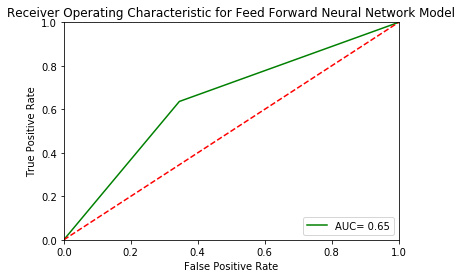

In [81]:
get_roc("Feed Forward Neural Network", model_preds_app.argmax(axis=1), y_test_nn_app.argmax(axis=1))